## 1. Data Preprocessing

In [1]:
import pandas as pd
#1-1 데이터 불러오기
data = pd.read_csv('/Users/parkyejun/Desktop/bigd_w13/서울대기오염_2019.xlsx - Sheet1.csv')

In [2]:
#맨 첫번째 row는 전체 평균, 각 날짜별로 전체 측정소 평균값도 존재함.
print(data['측정소명'].nunique())
print(data['날짜'].nunique())

26
366


In [3]:
#1-2
#분석변수 추출 및 컬럼명 변경
data = data[['날짜', '측정소명', '미세먼지', '초미세먼지']]
data.columns = ['date', 'district', 'pm10', 'pm25']


In [4]:
#1-3 결측치 확인
# PM10, PM2.5의 결측치 확인
data.isna().sum()

date          0
district      0
pm10        213
pm25        203
dtype: int64

In [5]:
data.isna().groupby(data['district']).sum()

,date,district,pm10,pm25
district,,,,
강남구,0,0,10,10
강동구,0,0,4,7
강북구,0,0,0,0
강서구,0,0,2,2
관악구,0,0,53,54
광진구,0,0,0,1
구로구,0,0,6,1
금천구,0,0,2,1
노원구,0,0,1,1


In [6]:
#1-3 이상치 탐지
data.describe()
#딱히 이상치랄건 없어보인다. max값이 228, 158이면
#결측치만 처리해주면 될듯 - interpolation으로 처리

data.interpolate(method='linear', inplace=True)

In [7]:
data.isna().sum() # 결측치 없음

date        0
district    0
pm10        0
pm25        0
dtype: int64

In [8]:
# 1-4 데이터 타입 변환
data.info()
#date에 전체 들어가 있으면 처리가 안되어서 제거해주기
data = data.iloc[1:, :]
data['date'] = pd.to_datetime(data['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9491 entries, 0 to 9490
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      9491 non-null   object 
 1   district  9491 non-null   object 
 2   pm10      9491 non-null   float64
 3   pm25      9491 non-null   float64
dtypes: float64(2), object(2)
memory usage: 296.7+ KB


In [9]:
# 2-1 month, day 파생변수 추가
import numpy as np
data = data.copy()
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# 2-2 season 파생변수 추가
data['season'] = np.where(data['month'].isin([3, 4, 5]), 'spring',
                         np.where(data['month'].isin([6, 7, 8]), 'summer',
                                  np.where(data['month'].isin([9, 10, 11]), 'fall', 'winter')))

In [10]:
# 3-1 데이터 확인
data

,date,district,pm10,pm25,month,day,season
1,2019-12-31,평균,26.0,15.0,12,31,winter
2,2019-12-31,강남구,22.0,14.0,12,31,winter
3,2019-12-31,강동구,27.0,19.0,12,31,winter
4,2019-12-31,강북구,31.0,17.0,12,31,winter
5,2019-12-31,강서구,29.0,16.0,12,31,winter
...,...,...,...,...,...,...,...
9486,2019-01-01,용산구,30.0,24.0,1,1,winter
9487,2019-01-01,은평구,33.0,22.0,1,1,winter
9488,2019-01-01,종로구,34.0,21.0,1,1,winter
9489,2019-01-01,중구,36.0,25.0,1,1,winter


In [11]:
#3-2 데이터 확인 및 저장
data.to_csv('card_output.csv', index=False)

## 2. Data Analysis

In [12]:
df = pd.read_csv('card_output.csv')
df['date'] = pd.to_datetime(df['date'])

In [13]:
# 4-1 연간 미세먼지 평균 구하기
# district 별 평균 데이터는 제거해줘야 함
df = df[df['district'] != '평균']
df['pm10'].mean().round(2)

# 분석결과
# 2019년 서울의 미세먼지 평균 농도는 41.43ug/m3 이다.

41.42

In [14]:
#5-1 미세먼지 최대값 날짜 및 구 확인
max_pm10 = df[df['pm10'] == df['pm10'].max()][['date', 'district', 'pm10']]
max_pm10

# 분석결과
# 강북구에서 2019년 3월 5일에 미세먼지 농도가 228ug/m3로 가장 높았다.

,date,district,pm10
7829,2019-03-05,강북구,228.0


In [15]:
#6-1 PM10 평균 계산 district 별로
district_pm10_mean = df.groupby('district')['pm10'].mean().reset_index()
district_pm10_mean = district_pm10_mean.sort_values(by='pm10', ascending=False)
district_pm10_mean = district_pm10_mean.rename(columns={'pm10': 'avg_pm10'})
#6-2 상위 5개만 뽑기
district_pm10_mean.iloc[:5, :]

# 분석결과
# 2019년 서울에서 미세먼지 농도가 가장 높은 지역은 양천구, 강서구, 관악구, 강북구, 마포구 순이다.


,district,avg_pm10
18,양천구,47.606849
3,강서구,46.456164
4,관악구,45.663014
12,마포구,44.986986
2,강북구,44.950685


In [16]:
# 7-1 계절별 평균 pm10, pm25 동시 출력
season_pm10 = df.groupby('season')['pm10'].mean().reset_index()
season_pm25 = df.groupby('season')['pm25'].mean().reset_index()
season_pm10 = season_pm10.rename(columns={'pm10': 'avg_pm10'})
season_pm25 = season_pm25.rename(columns={'pm25': 'avg_pm25'})
season_pm = pd.merge(season_pm10, season_pm25, on='season')
season_pm = season_pm.sort_values(by='avg_pm10', ascending=False)
season_pm

# 분석결과
# 2019년 서울에서 미세먼지 농도가 가장 높은 계절은 겨울, 봄, 가을, 여름 순이다.

,season,avg_pm10,avg_pm25
3,winter,54.625556,33.635333
1,spring,54.087826,31.559565
0,fall,30.723736,15.581758
2,summer,26.401522,18.148696


In [17]:
# 8-1 PM10 값을 기준으로 등급 분류
df['pm_grade'] = pd.cut(df['pm10'], bins = [0, 31, 81, 151, df['pm10'].max()+1], labels= ['good', 'normal', 'bad', 'worse'])

# 8-2 전체 데이터 기준 등급별 빈도, 비율 계산
pm_grade = df['pm_grade'].value_counts()
pm_grade_ratio = df['pm_grade'].value_counts(normalize=True).round(2)
pm_grade = pm_grade.reset_index()
pm_grade_ratio = pm_grade_ratio.reset_index()
pm_grade.columns = ['pm_grade', 'count']
pm_grade = pd.merge(pm_grade, pm_grade_ratio, on='pm_grade')
pm_grade.columns = ['pm_grade', 'n', 'pct']
pm_grade

# 분석결과
# 전체 데이터 기준으로 미세먼지 농도가 좋음, 보통, 나쁨, 매우나쁨으로 분류했을 때
# 좋음 : 0.41, 보통 : 0.52, 나쁨 : 0.06, 매우나쁨 : 0.01 비율로 나타났다.

,pm_grade,n,pct
0,normal,4719,0.52
1,good,3748,0.41
2,bad,579,0.06
3,worse,79,0.01


In [18]:
# 9-1 구별 등급 분포 중 'good' 빈도와 전체 대비 비율 계산

In [19]:
df_good = []
for district in df['district'].unique():
    sub = df[df['district'] == district]
    good_count = (sub['pm_grade'] == 'good').sum()
    total_count = len(sub)
    good_pct = good_count / total_count if total_count > 0 else 0
    df_good.append({'district': district, 'n': good_count, 'pct': good_pct})

df_good = pd.DataFrame(df_good)
df_good = df_good.sort_values(by='pct', ascending=False).reset_index(drop=True)
df_good[:5] # 상위 5개만 확인

# 분석결과
# 구별 미세먼지 농도가 좋음으로 분류된 비율을 확인했을 때
# 용산구, 중랑구, 동대문구, 중구, 종로구 순으로 좋음 비율이 높았다.

,district,n,pct
0,용산구,210,0.575342
1,중랑구,187,0.512329
2,동대문구,180,0.493151
3,중구,176,0.482192
4,종로구,170,0.465753


/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/pytho

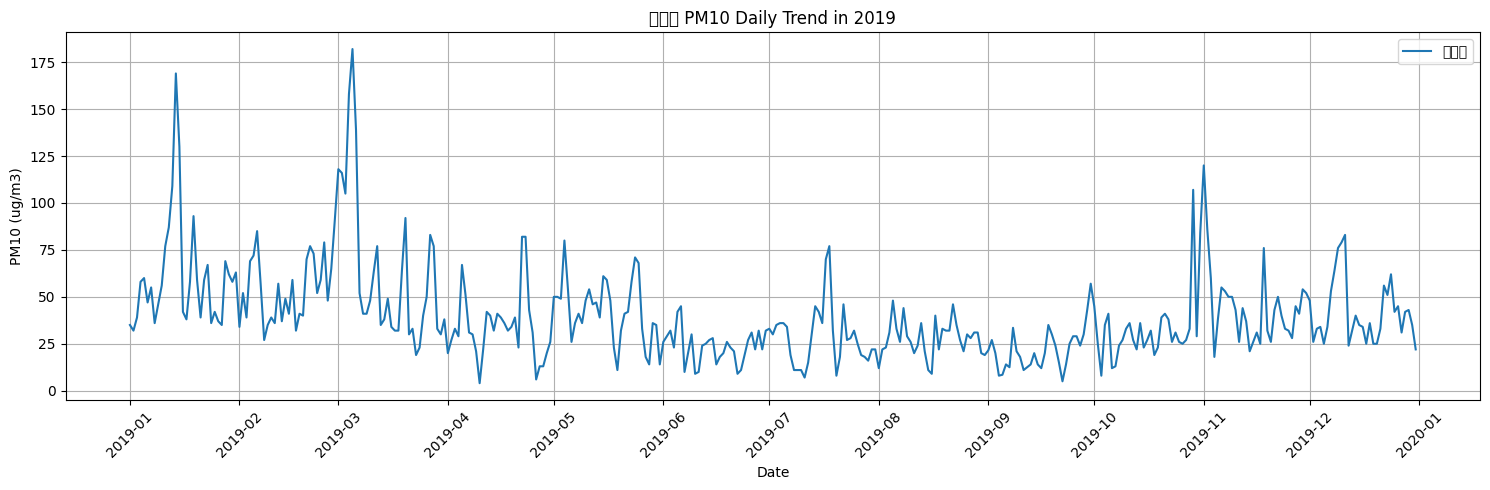

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


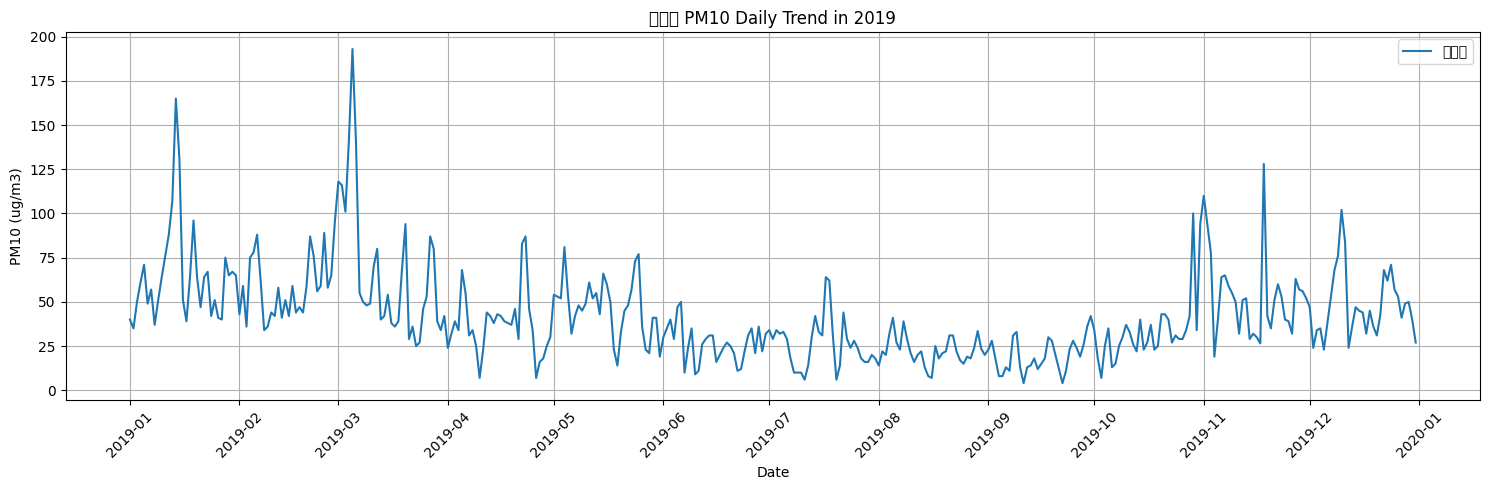

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


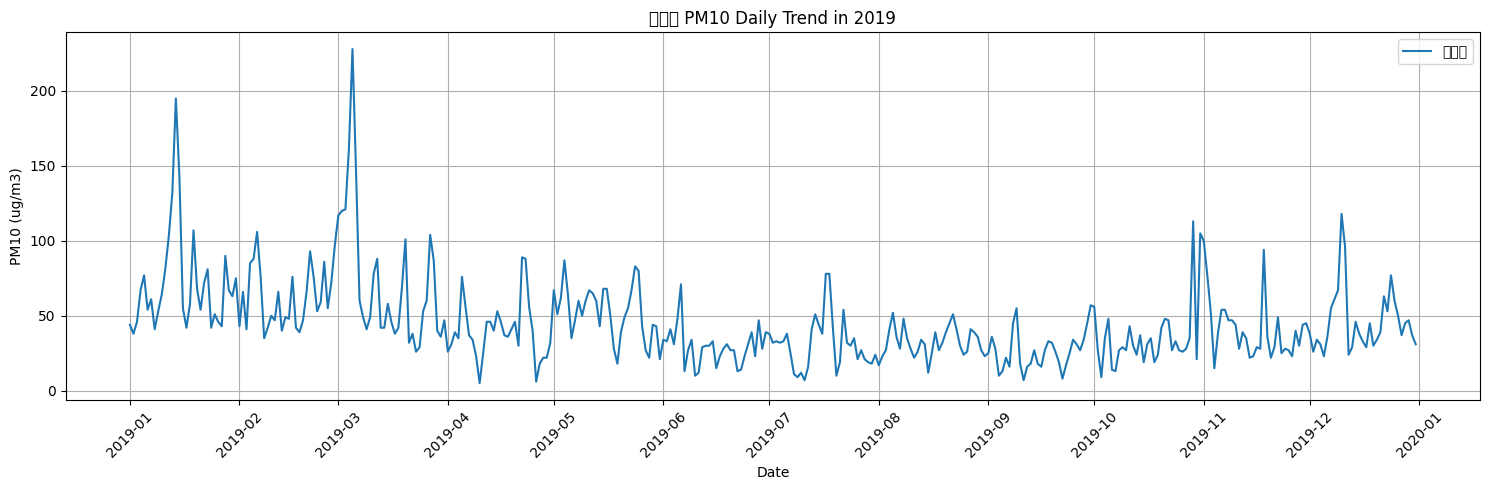

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


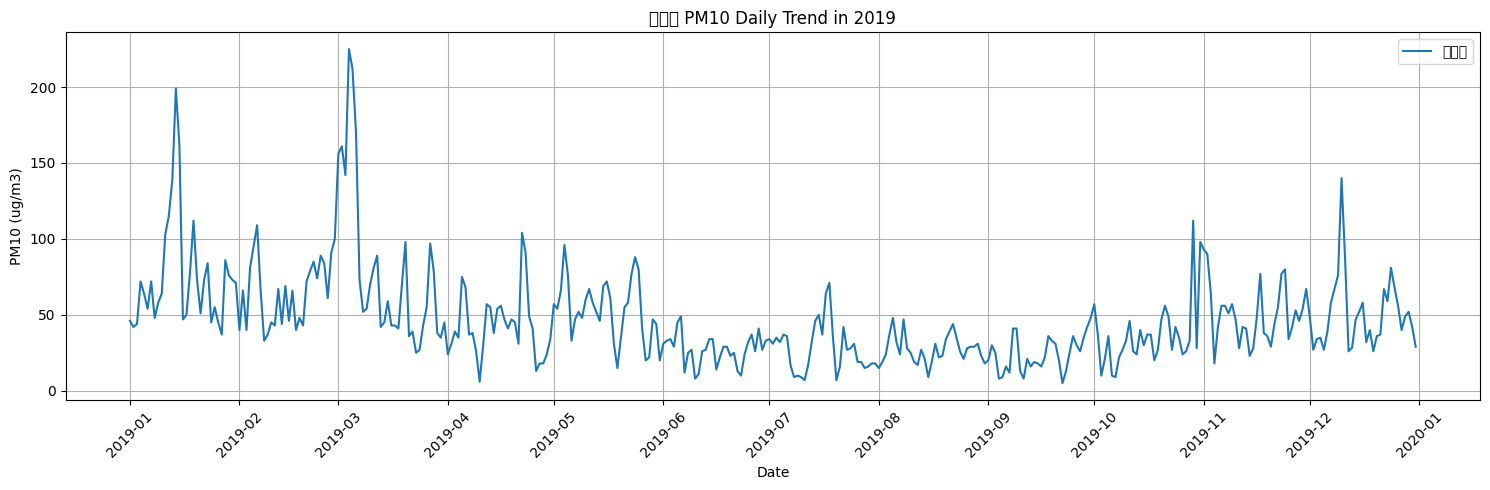

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 50501 (\N{HANGUL SYLLABLE AG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50501 (\N{HANGUL SYLLABLE AG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


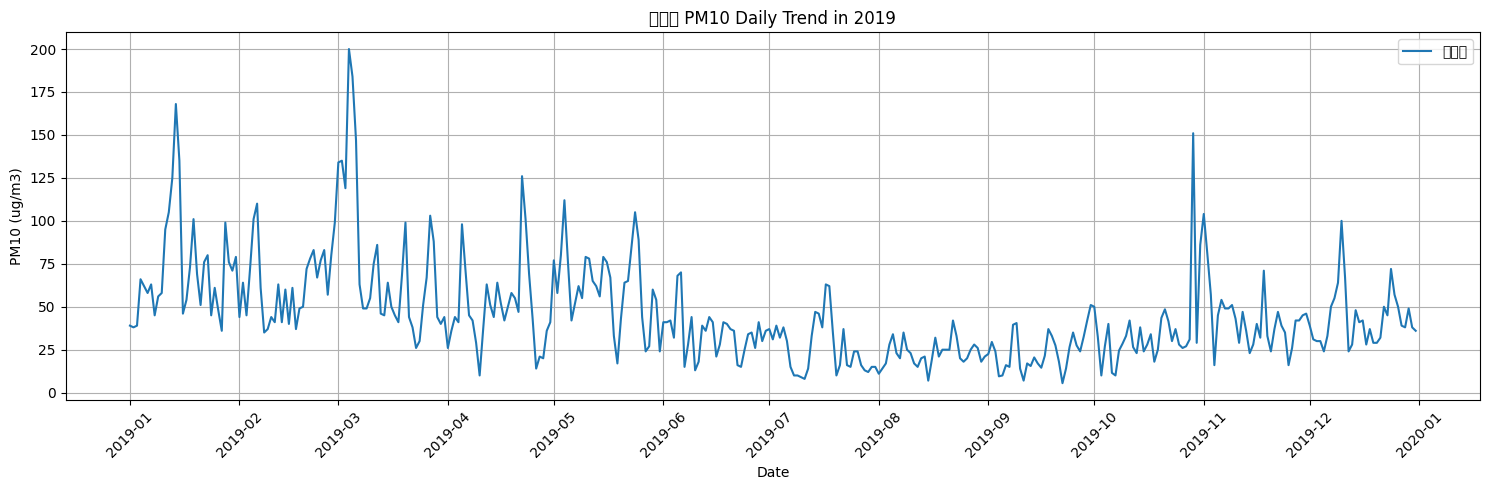

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


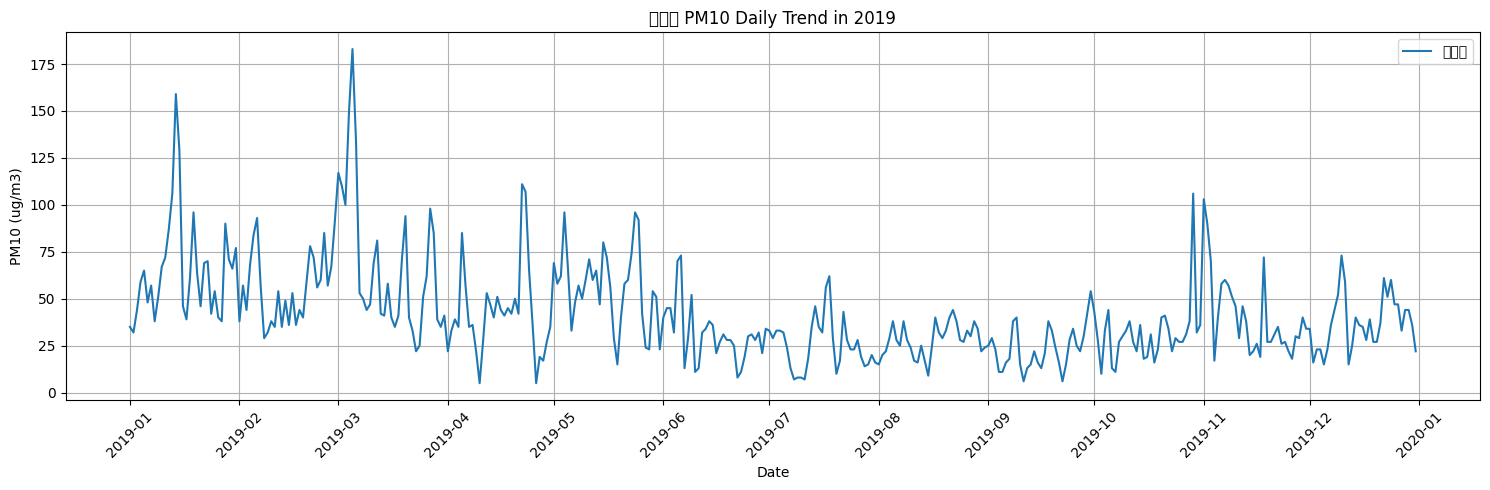

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


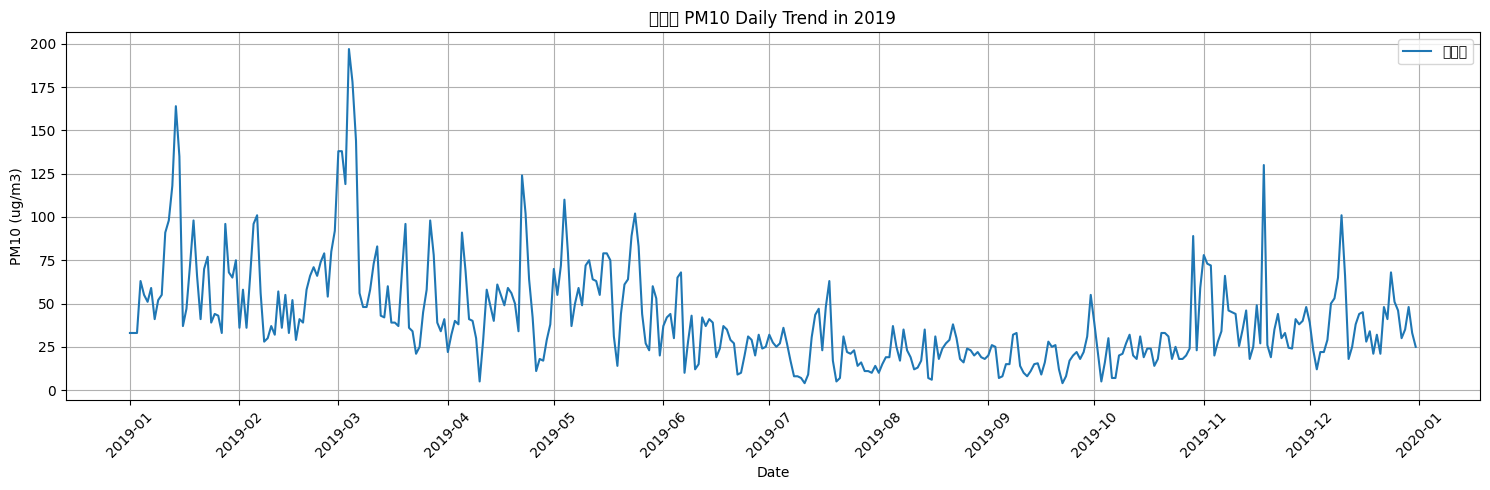

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


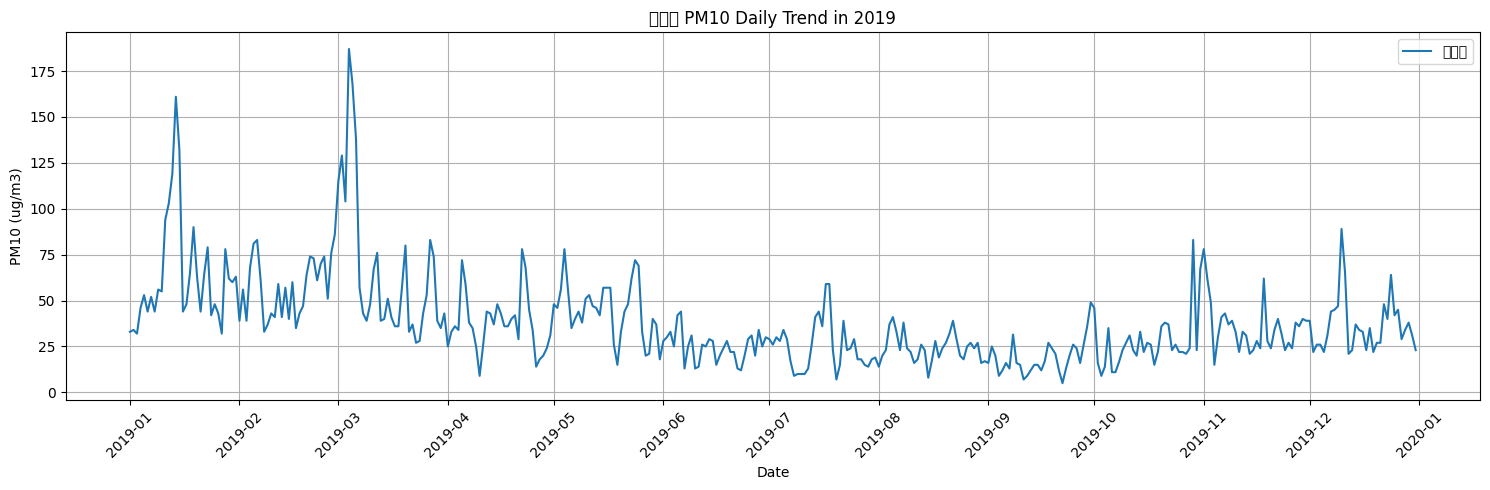

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


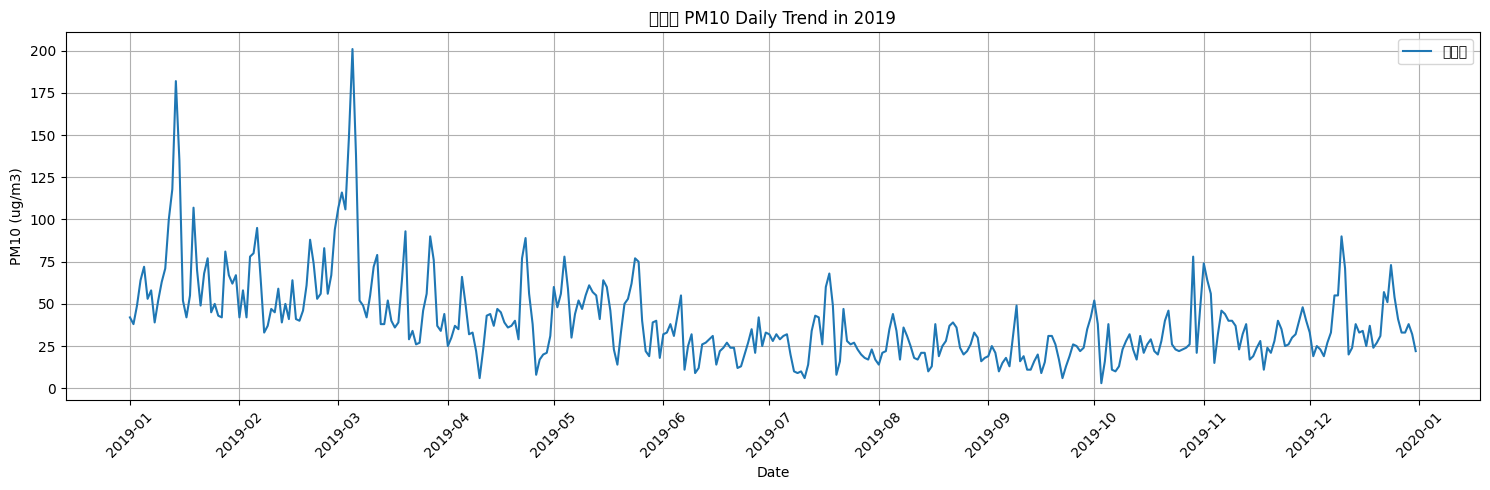

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


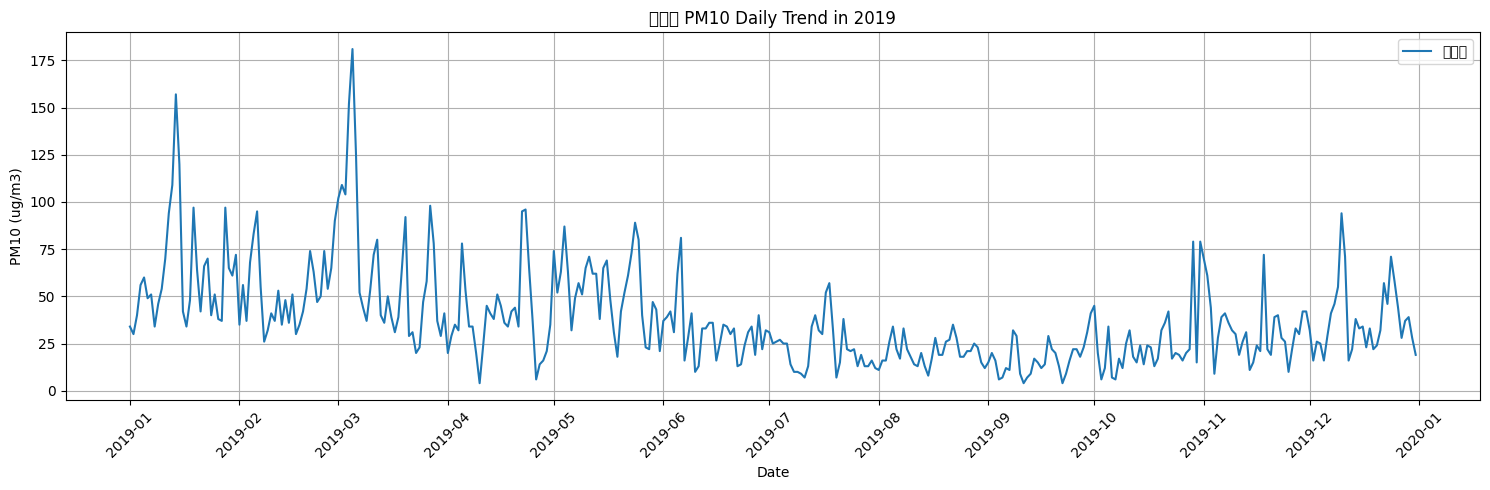

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


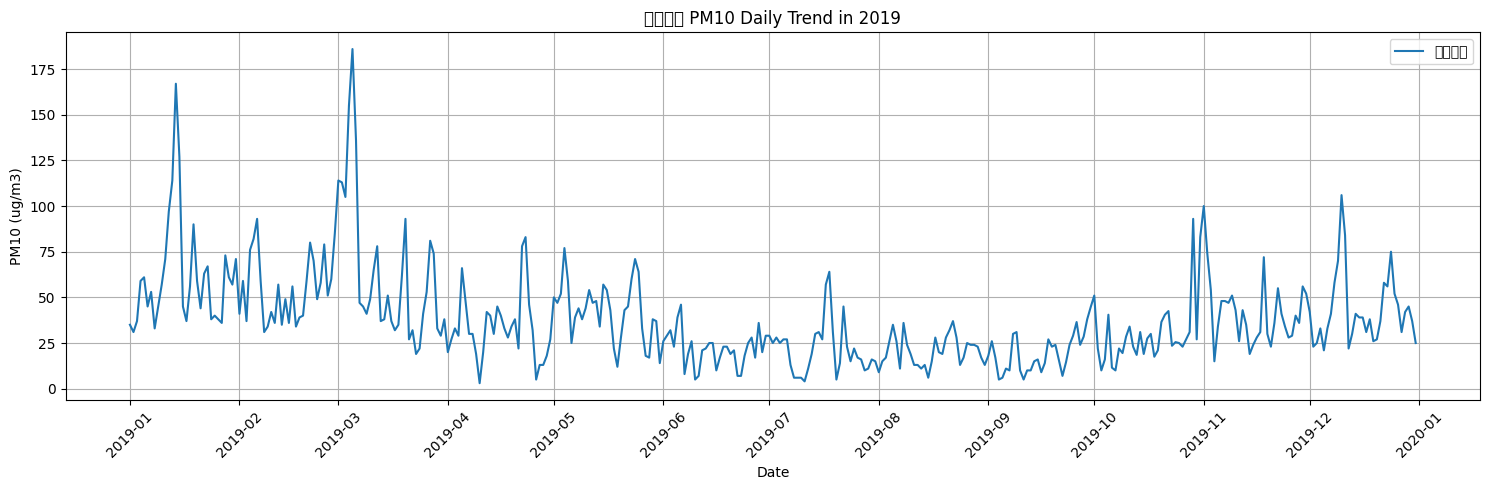

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


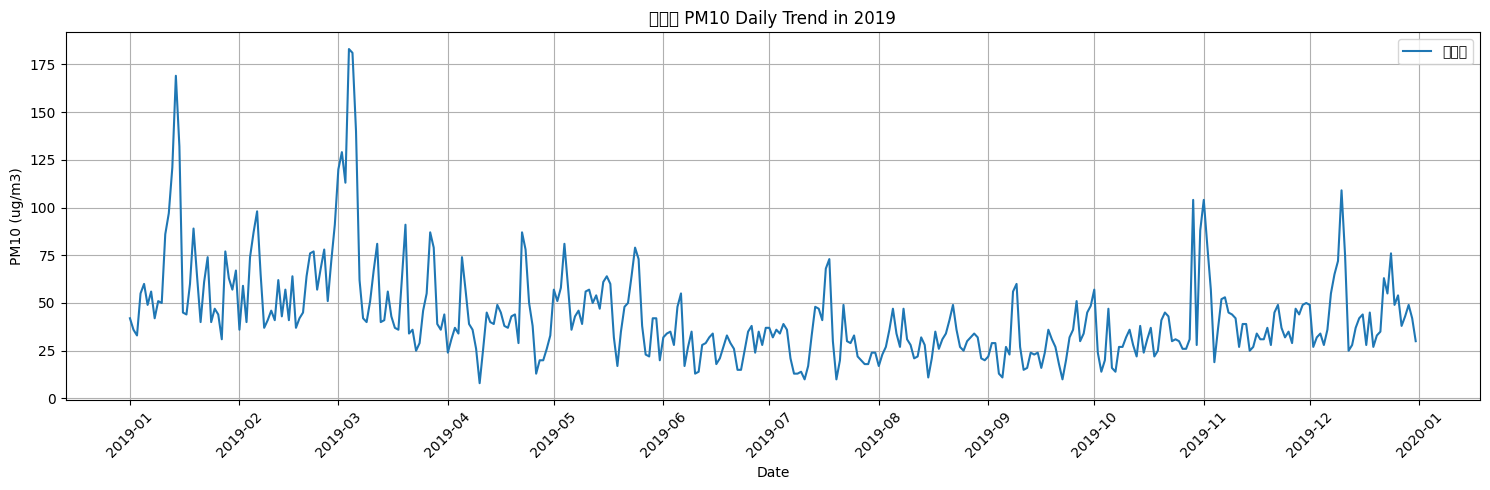

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


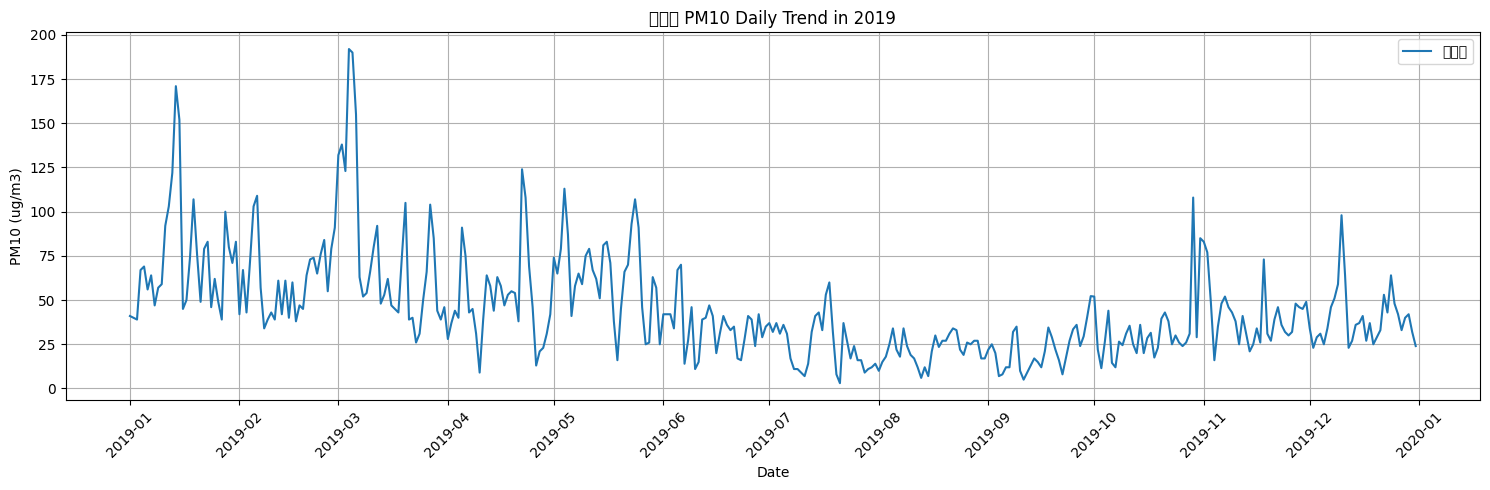

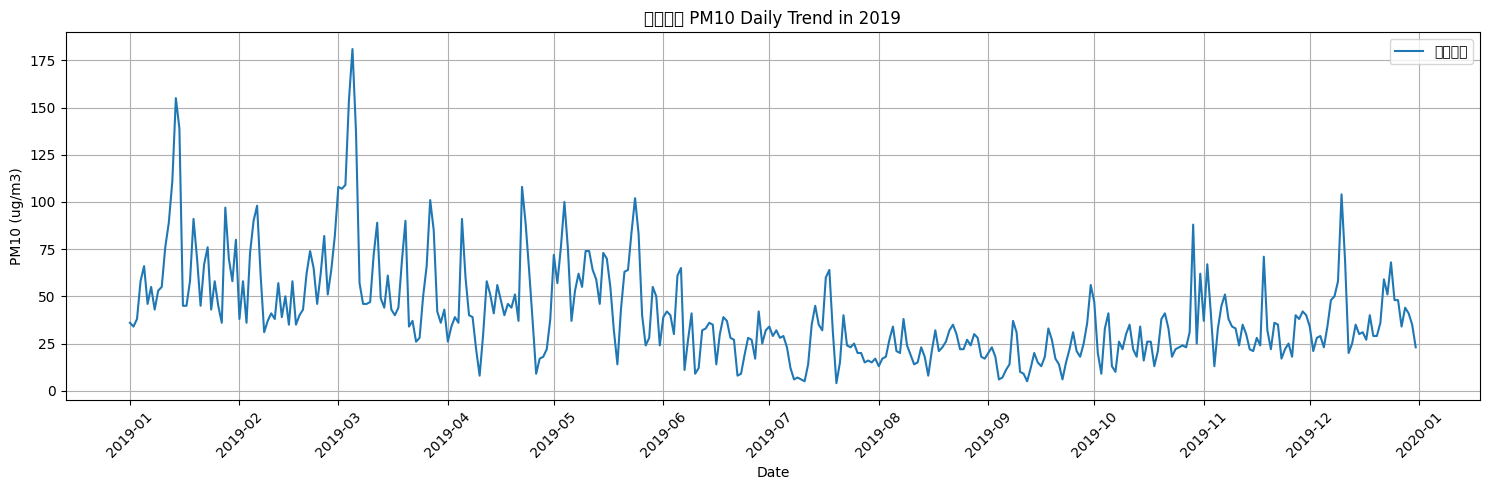

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


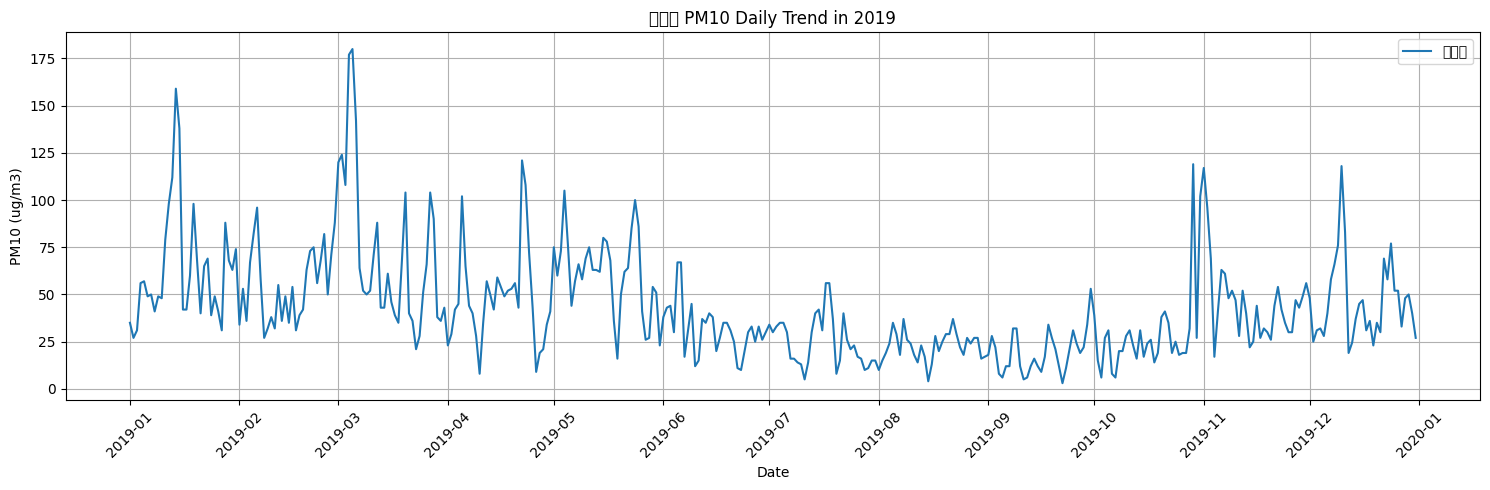

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


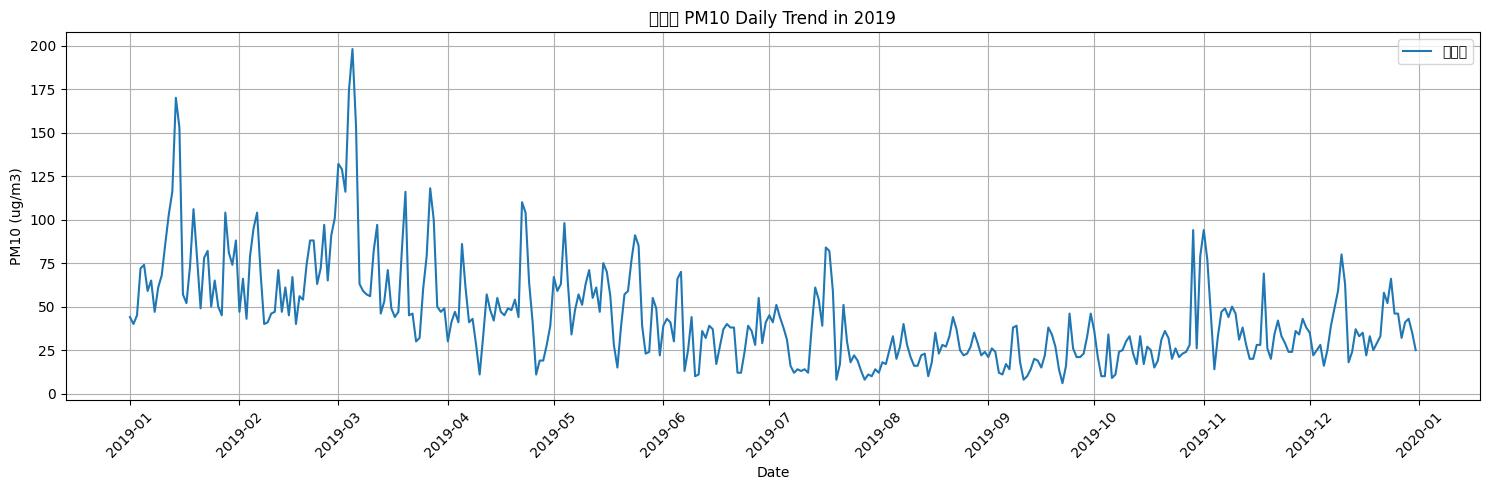

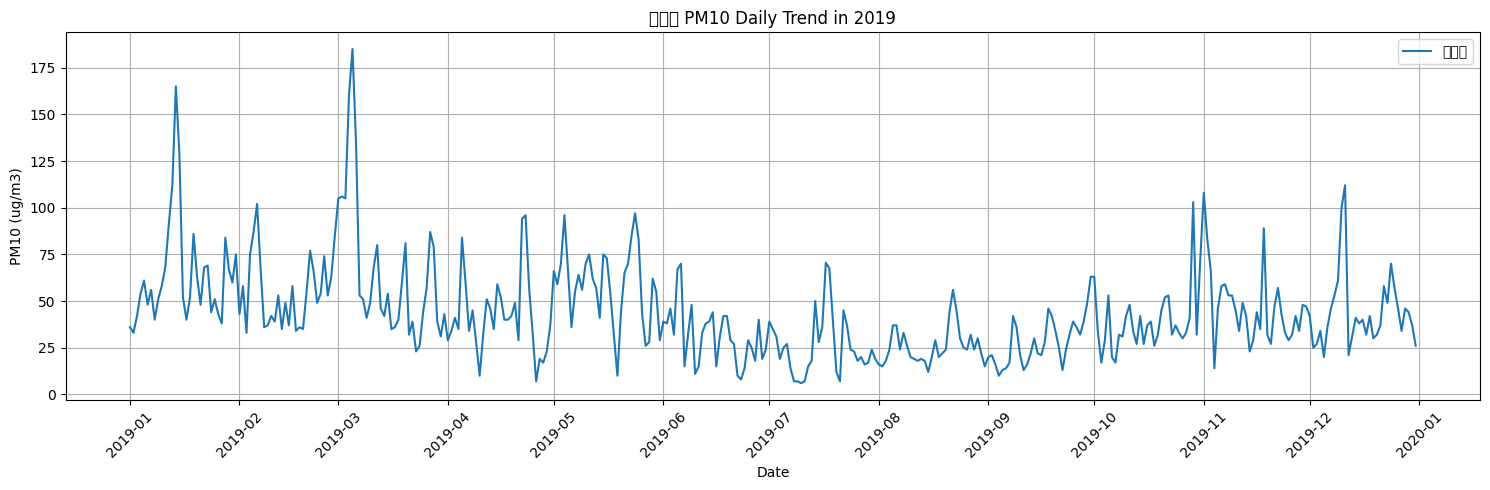

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


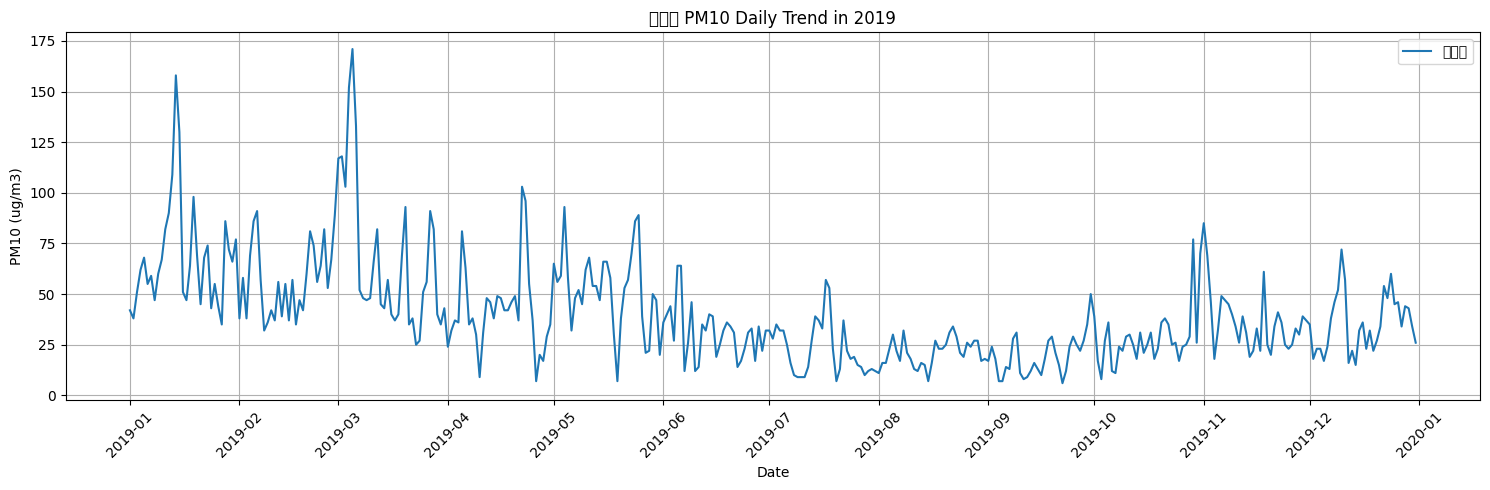

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


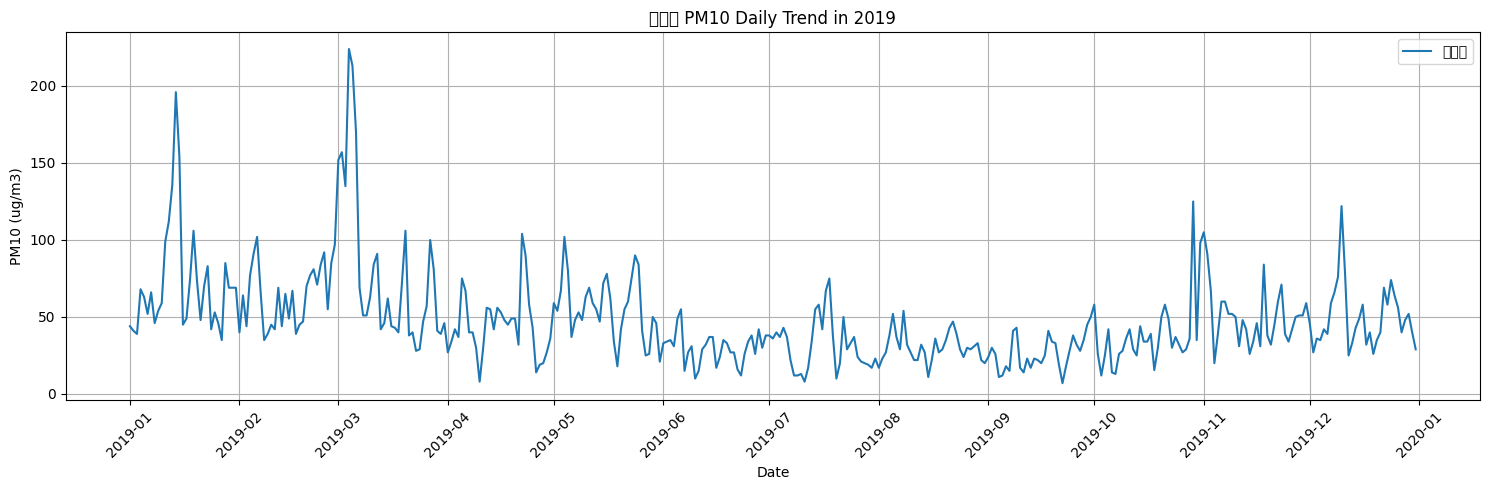

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


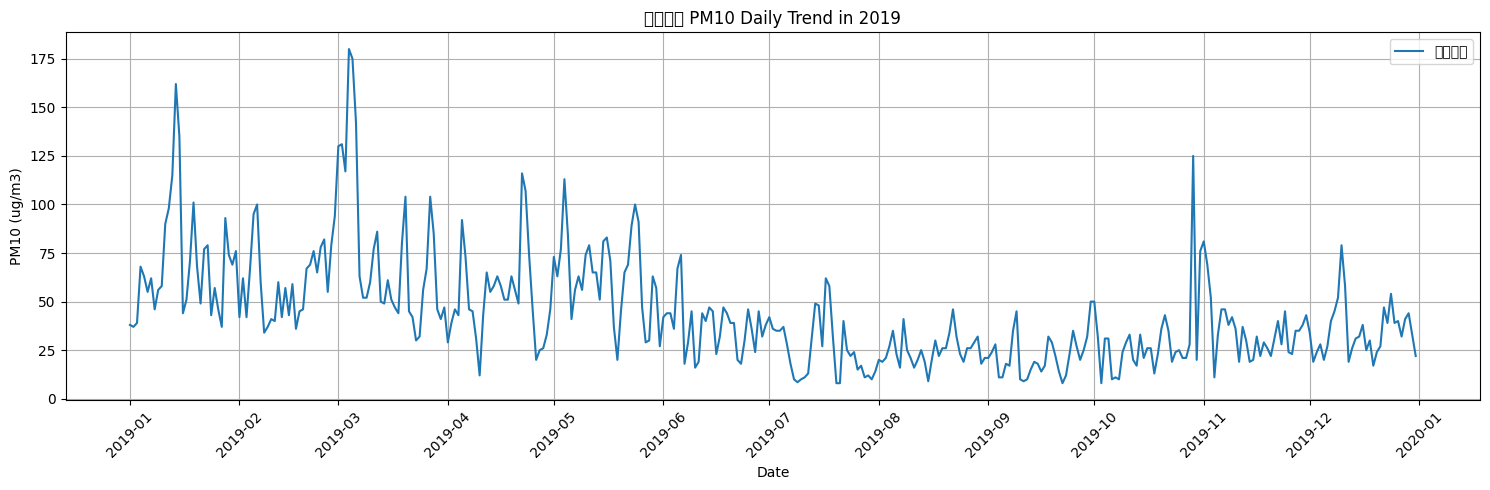

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


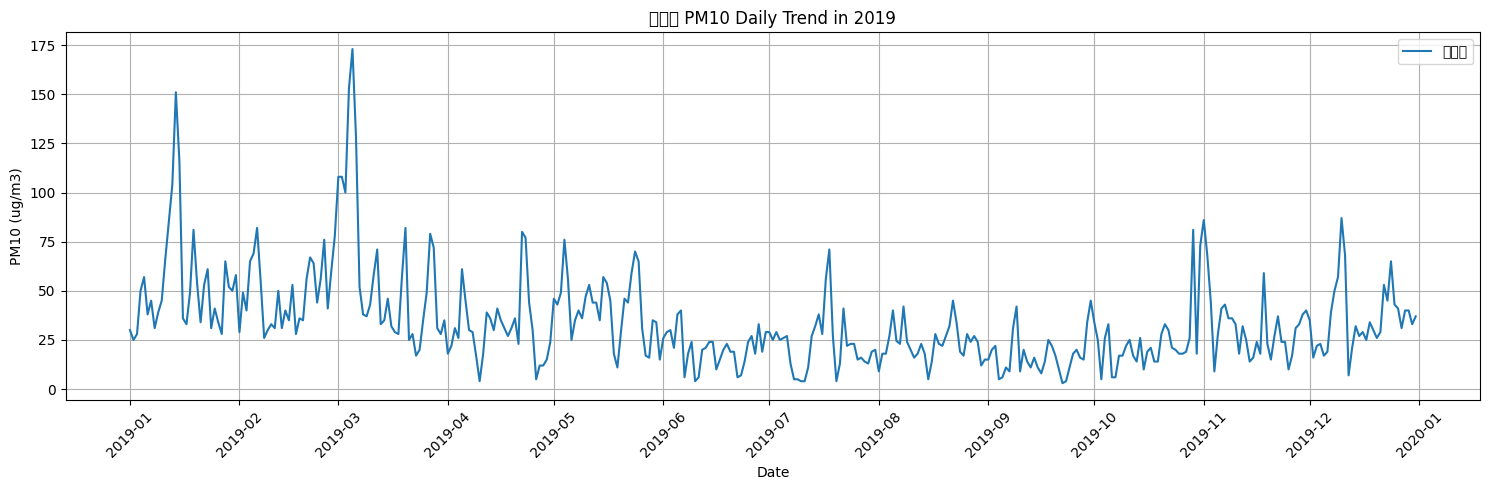

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  plt.tight_layout()
/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


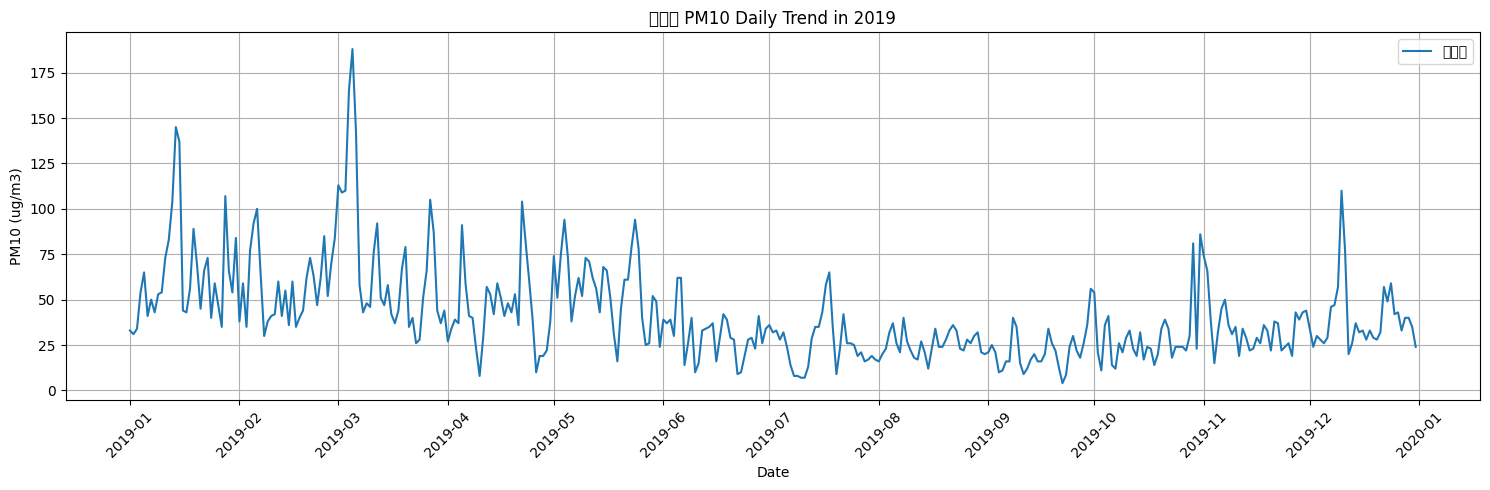

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


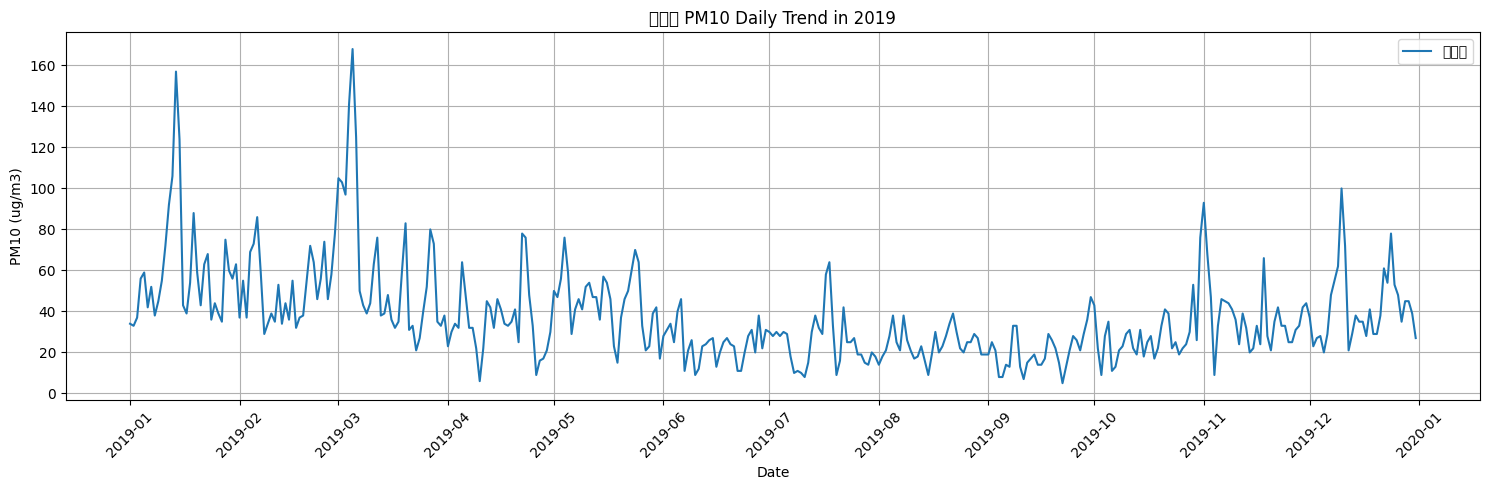

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


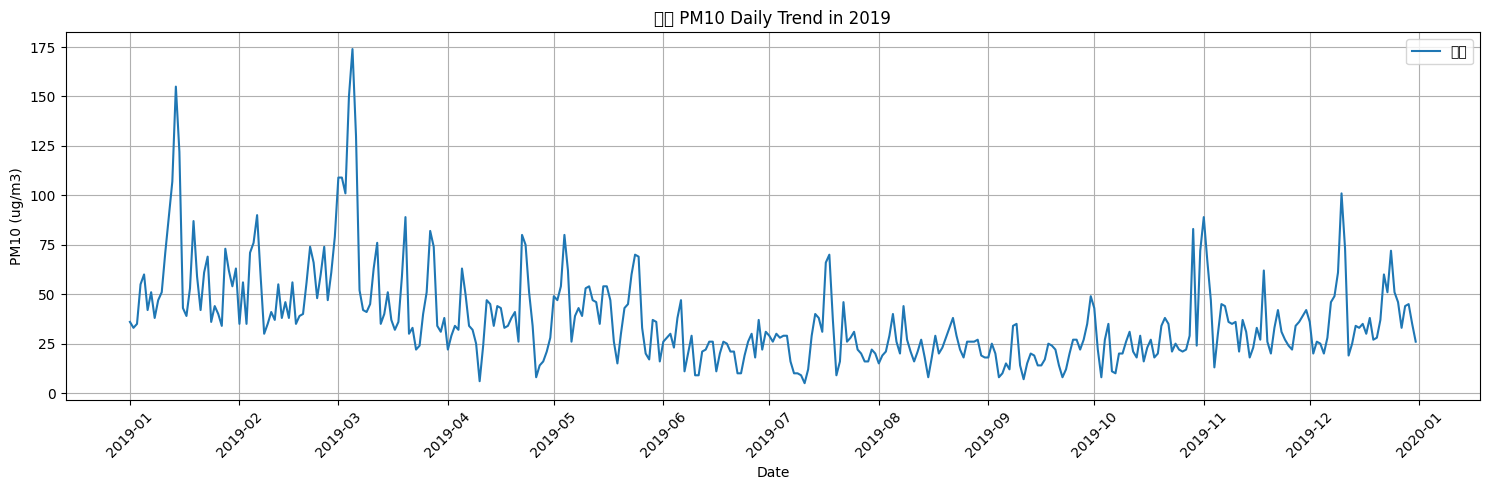

/var/folders/17/bjxjmm794r1b27lb48k4wqr40000gn/T/ipykernel_11381/1505288251.py:18: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/bigdata/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


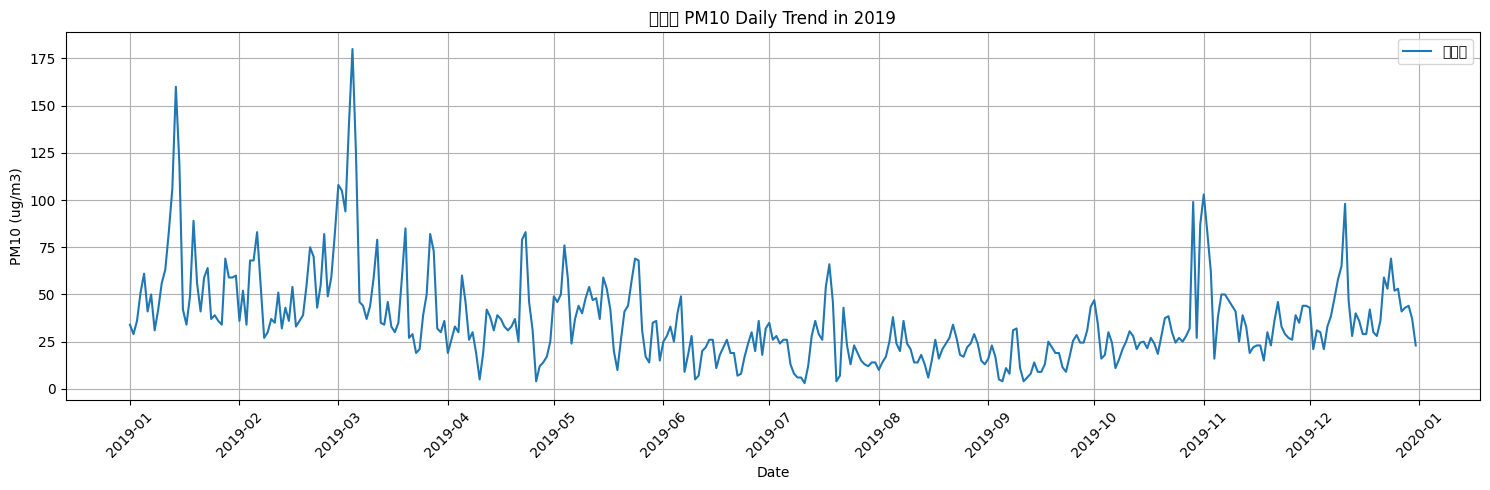

In [20]:
# 10 -1 미세먼지 농도 시계열 그래프 그리기
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

for district in df['district'].unique():
    sub = df[df['district'] == district]
    plt.figure(figsize=(15, 5))
    plt.plot(sub['date'], sub['pm10'], label=district)
    plt.title(f'{district} PM10 Daily Trend in 2019')
    plt.xlabel('Date')
    plt.ylabel('PM10 (ug/m3)')
    plt.xticks(rotation=45)
    # x축 눈금: 월 단위로 표시 (혹은 mdates.DayLocator(interval=7)로 주 단위도 가능)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# 분석결과
# 2019년 서울의 미세먼지 농도는 계절에 따라 차이가 있었고, 특히 겨울철에 농도가 높았다.
# district 별로는 큰 차이가 없어 보이며, 이는 서울시 전체 대기오염이 비슷한 양상을 보였음을 나타낸다.
# district 간의 거리가 크게 차이나지 않기 때문에, 대기오염의 원인도 비슷할 것으로 보인다.

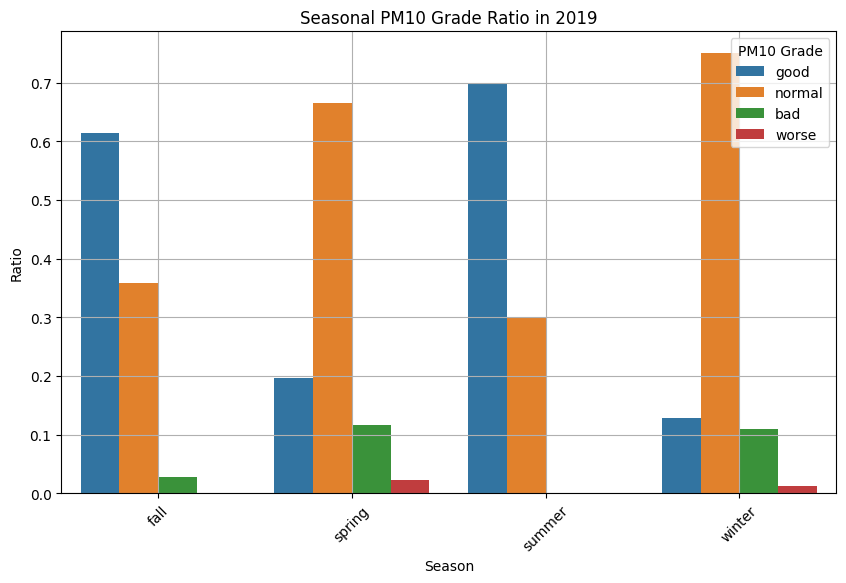

In [22]:
# 11 계절별 PM10 등급 비율 그래프
# 11-1 계절별 PM10 등급 비율 계산
import seaborn as sns
season_pm_grade = df.groupby(['season', 'pm_grade']).size().reset_index(name='count')
season_pm_grade['pct'] = season_pm_grade.groupby('season')['count'].transform(lambda x: x / x.sum())
season_pm_grade = season_pm_grade.pivot(index='season', columns='pm_grade', values='pct').reset_index()
season_pm_grade = season_pm_grade.fillna(0)
season_pm_grade = season_pm_grade.rename_axis(None, axis=1)
season_pm_grade = season_pm_grade.melt(id_vars='season', var_name='pm_grade', value_name='pct')
season_pm_grade = season_pm_grade.sort_values(by='season')
season_pm_grade['pm_grade'] = pd.Categorical(season_pm_grade['pm_grade'], categories=['good', 'normal', 'bad', 'worse'], ordered=True)
season_pm_grade = season_pm_grade.sort_values(by='season', ascending=True)

# 11-2 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=season_pm_grade, x='season', y='pct', hue='pm_grade')
plt.title('Seasonal PM10 Grade Ratio in 2019')
plt.xlabel('Season')
plt.ylabel('Ratio')
plt.legend(title='PM10 Grade')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 분석결과
# 대체로 여름과 가을에는 청명한 날씨가 많다.
# 반대로 겨울과 봄에는 미세먼지 농도가 눈에 띄게 높아지는 경향이 있다.
# worse도 여름엔 0%로 나타나지만 spring과 winter에서는 약 0.01%로 나타나고 있다.